<a href="https://colab.research.google.com/github/JuanVelandia2702/CIENCIA_DATOS_2025/blob/main/dataset_2_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
portfolio = pd.read_csv('/content/MOCK_DATA (2).csv')

In [10]:
print(portfolio.info())
print('--------------head-----------')
print(portfolio.head())
print('--------------description-----------')
print(portfolio.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   portfolio_id         1000 non-null   int64  
 1   investment_name      1000 non-null   object 
 2   purchase_price       1000 non-null   float64
 3   sale_price           1000 non-null   float64
 4   profit               1000 non-null   float64
 5   investment_type      1000 non-null   object 
 6   investment_date      1000 non-null   object 
 7   investment_duration  1000 non-null   int64  
 8   risk_level           1000 non-null   object 
 9   investment_sector    1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB
None
--------------head-----------
   portfolio_id investment_name  purchase_price  sale_price     profit  \
0             1              Dr       440060.34     2427.57 -437632.77   
1             2             Rev       324276.57 

In [14]:
print(portfolio.profit.mean)
print(portfolio.profit.median)
print(trim_mean(portfolio.profit, 0.1))


<bound method Series.mean of 0     -437632.77
1      171835.88
2      376385.74
3     -402764.94
4     -310260.04
         ...    
995    785694.93
996   -754957.99
997    492673.12
998   -243956.81
999    757447.12
Name: profit, Length: 1000, dtype: float64>
<bound method Series.median of 0     -437632.77
1      171835.88
2      376385.74
3     -402764.94
4     -310260.04
         ...    
995    785694.93
996   -754957.99
997    492673.12
998   -243956.81
999    757447.12
Name: profit, Length: 1000, dtype: float64>
4184.446124999989


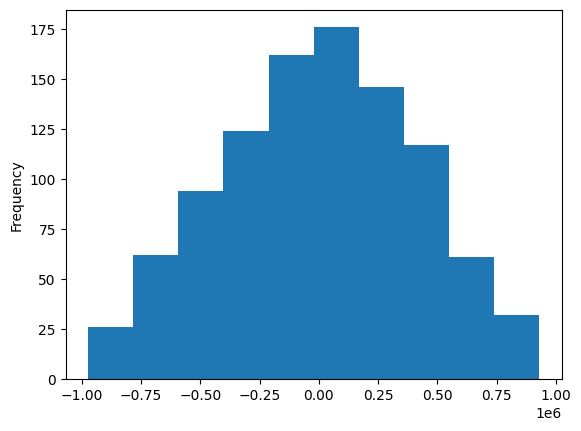

In [19]:
portfolio.profit.plot.hist()
plt.show()

In [23]:
#quiero encontrar la correlacion entre profit y investment sector
#la columna investment sector almacena cualquier tipo de string por lo cual se modifica a categoria
portfolio['investment sector'] = portfolio['investment_sector'].astype('category')

In [27]:
profit_by_sector = portfolio.groupby('investment_sector')['profit'].agg(['sum', 'mean', 'median']).sort_values(by='mean', ascending=False)

print("\n--- Profit Statistics by Sector ---")
print(profit_by_sector)



--- Profit Statistics by Sector ---
                           sum          mean     median
investment_sector                                      
Healthcare          7423191.37  22982.016625  38052.390
Finance             4888192.54  14548.192083  27014.195
Technology        -10212595.09 -29948.959208 -38481.400


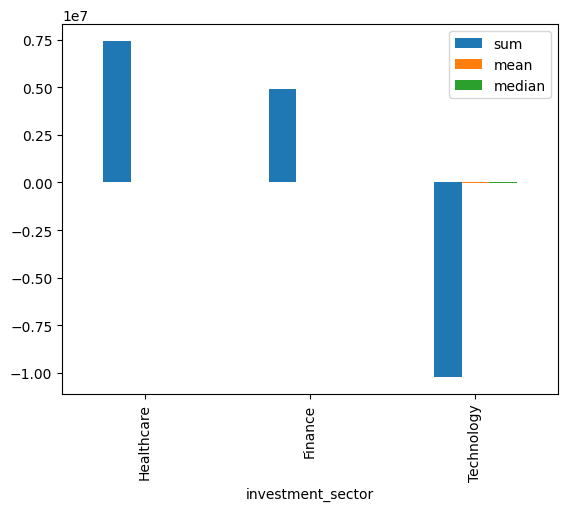

In [28]:
profit_by_sector.plot.bar()
plt.show()